<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/workshops-regression-classification/taller_regresion_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller (ejemplos-ejercicios) de Machine learning

En este taller se estudia la técnica de aprendizaje de máquina enfocada en problemas de regresión.

In [ ]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_csv("Fish.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (159, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- TO-DO: La tabla anterior revela que...

In [ ]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
df1.sample(5) # Display random 5 records

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Text(0.5, 1.0, 'Correlation Matrix')

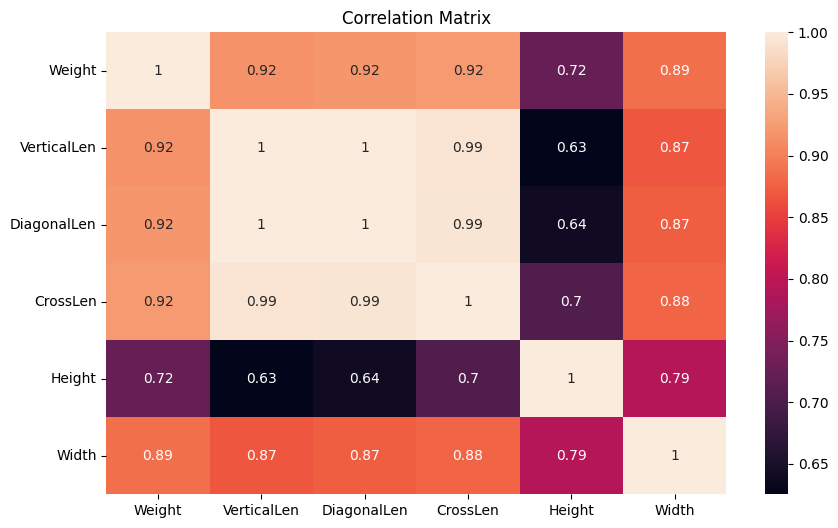

In [ ]:
# y como parte de un análisis, revisaremos la correlación de las variables
df2 = df1.drop("Species", axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

Al analizar la correlación, vemos que las variables CrossLen, VerticalLen y DiagonalLen están altamente correlacionadas (su valor de correlación es cercano al 1) por lo que, conservar estas variables puede causar problemas, es decir, el dataset no tendría variables linealmente independientes, lo que es un requisito para crear modelos de regresión.


In [ ]:
# eliminando variables no independientes
df3 = df1.drop(["DiagonalLen", "CrossLen"], axis=1)
df3.head()

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


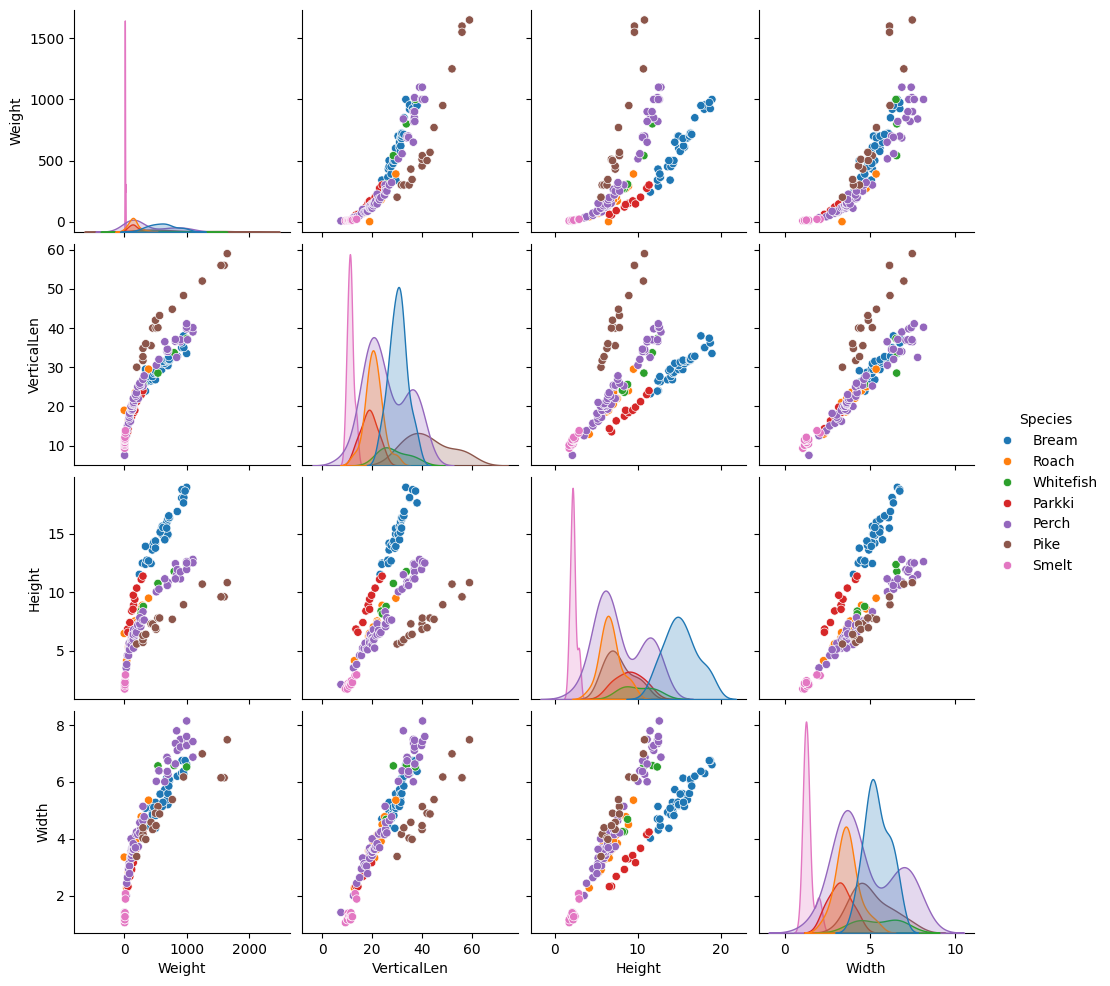

In [ ]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="Species")
# en el pairplot se puede apreciar que hay ciertas correlaciones entre ancho y alto. Sin embargo, entre diferentes especies hay variaciones.

In [ ]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

,0
Species,0
Weight,0
VerticalLen,0
Height,0
Width,0


In [ ]:
# Eliminando casos imposibles con la lógica del dataset. Por ejemplo, peces con peso o longitudes que sean cero
df3[df3["Weight"] == 0]
# se debe mostrar una tabla con los eliminados, eliminamos empleando el index

,Species,Weight,VerticalLen,Height,Width
40,Roach,0.0,19.0,6.4752,3.3516


In [ ]:
df3.drop([40])

,Species,Weight,VerticalLen,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,11.5,2.0904,1.3936
155,Smelt,13.4,11.7,2.4300,1.2690
156,Smelt,12.2,12.1,2.2770,1.2558
157,Smelt,19.7,13.2,2.8728,2.0672


In [ ]:
# ya que las especies son un valor categórico, y necesitamos números para entrenar modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los nombres de especies (7 especies) en un arreglo de 1x7 donde solo se verá un uno (True) en la columna que corresponda al nombre, en el otro caso se tendrán ceros (False).
especies_codificadas = pd.get_dummies(df3.Species)
especies_codificadas.head()

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [ ]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df3, especies_codificadas], axis="columns")
df4.head()
# como ya tenemos los nombres codificados, podemos deshacernos de la columna con los nombres y tambien la columna Whitefish
# que no nos sirve para el ejercicio, a Whitefish lo eliminamos porque solo hay 6 muestras, que son insuficientes para el ejercicio de entrenamiento de un modelo.
df5 = df4.drop(["Species", "Whitefish"], axis="columns")
df5.head()

,Weight,VerticalLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt
0,242.0,23.2,11.5200,4.0200,True,False,False,False,False,False
1,290.0,24.0,12.4800,4.3056,True,False,False,False,False,False
2,340.0,23.9,12.3778,4.6961,True,False,False,False,False,False
3,363.0,26.3,12.7300,4.4555,True,False,False,False,False,False
4,430.0,26.5,12.4440,5.1340,True,False,False,False,False,False


### Creando un modelo de regresión
Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación. También es necesario separar el dataframe en dos variables que sirvan como datos ($X$) y etiquetas ($y$)

In [ ]:
# X tendrá los datos de entrenamiento
X = df5[["Height", "Width", "VerticalLen", "Bream", "Parkki", "Pike", "Roach", "Smelt"]]
y = df5[["Weight"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (127, 8)
Tamaño de X_test= (32, 8)
Tamaño de y_train= (127, 1)
Tamaño de y_test= (32, 1)


### EJEMPLOS DE REGRESIÓN POLINÓMICA:

- **Regresión polinómica (no lineal):**

Como se tienen diferentes especies de peces, la relacion entre características como peso, ancho y alto no es lineal. Por lo tanto, una recta no va a modelar apropiadamente el comportamiento del peso de los peces en función de sus características.
 Crearemos una función para visualizar datos usando un polinomio con varios grados.

Las funciones que permiten trazar varios grados de un polinomio en función de los datos son `np.polyfit()` que funciona mediante mínimos cuadrados para resovler una ecuación polinómica. Esta función requiere suministrar datos (x,y) y el grado del polinomio a ajustar. Polyfit retornará los coeficientes que mejor se ajusten a los datos.

In [ ]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    x_coordinates = feature
    y_coordinates = np.squeeze(label)

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    #quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    #plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('Peso del pez')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Función lineal para la característica %s" % (feature.name))
    #plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

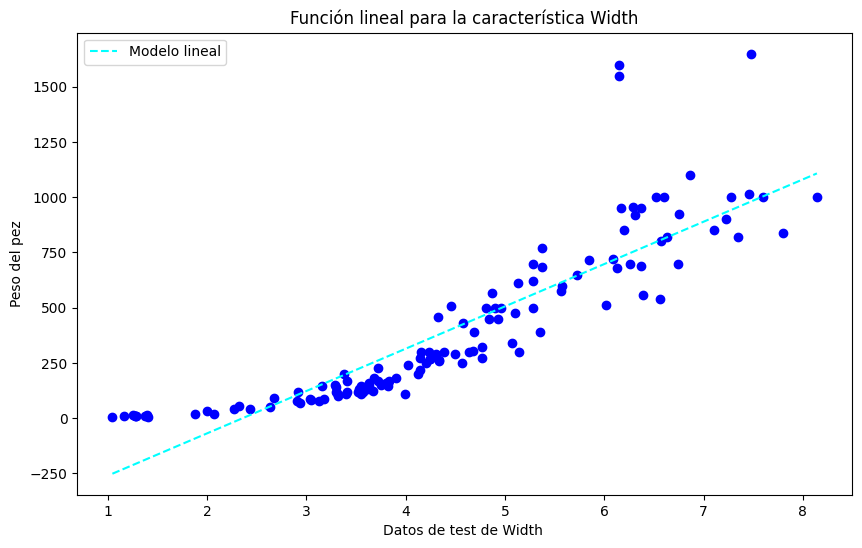

In [ ]:
polynomial_plot(X_train.Width, y_train) # comparando modelos para el ancho y el peso del pez

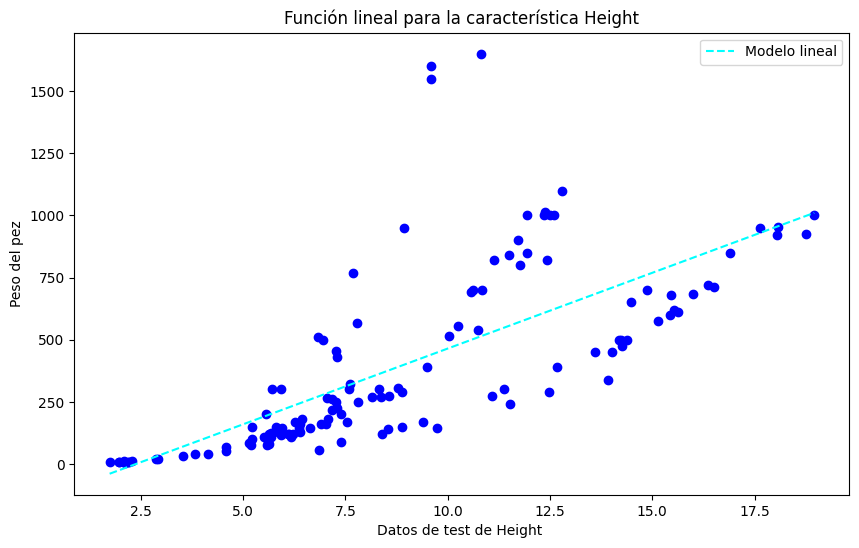

In [ ]:
polynomial_plot(X_train.Height, y_train) # comparando modelos para el alto y el peso del pez

- TO-DO: La gráfica anterior revela que...

# TAREA en clase/casa:

1. Interpretar los resultados anteriores
2. De acuerdo a lo anterior, aplicar al mismo dataset (escogido por usted) los 2 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple).

**Conclusión:**

se observa una relacion psotiva entre el amcho y el peso del pez. la pendiente es positiva , lo que indica que a medida que aumenta el ancho del pez, tambiénn aumenta su peso. pero se nota una disperción alrededor de la linea lo que quiere decir que el modelo tiene limitaciones en predecir con pesos mas altos

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Cargar el conjunto de datos
# Reemplaza 'tu_archivo.csv' con el nombre de tu archivo CSV
df = pd.read_csv('Fish.csv')

In [ ]:
# Mostrar las primeras filas del DataFrame
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [ ]:
# Seleccionar las variables para el análisis
# Para la regresión lineal simple, usando 'Length1' como variable independiente
X_simple = df[['Length1']]
y = df['Weight']


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [ ]:
# Crear el modelo de regresión lineal simple
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred_simple = model_simple.predict(X_test_simple)

In [ ]:
# Evaluar el modelo de regresión lineal simple
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

In [ ]:
# Imprimir las métricas
print(f'Regresión Lineal Simple:')
print(f'MSE: {mse_simple}')
print(f'RMSE: {rmse_simple}')
print(f'MAE: {mae_simple}')
print(f'R²: {r2_simple}')


Regresión Lineal Simple:
MSE: 26796.684740821387
RMSE: 163.69692953999285
MAE: 129.36788419512138
R²: 0.8116084146869396


Para el MSE y RMSE son altos, lo que indica que hay una cansidad de errores en las predicciones del modelo. lo que quiere decir que no hay una buena relacion entre las variables independientes length1 y la variable dependiente weight


 Para el R2 hizo una predicción buena pero no  con un de 0.81.  explica aproximadamente 81% de la variación en el peso de las especies, pero tambien indca que hay un 19% que no se puede explicar puede que hayan variables que no se incluyeron y que influian en el peso

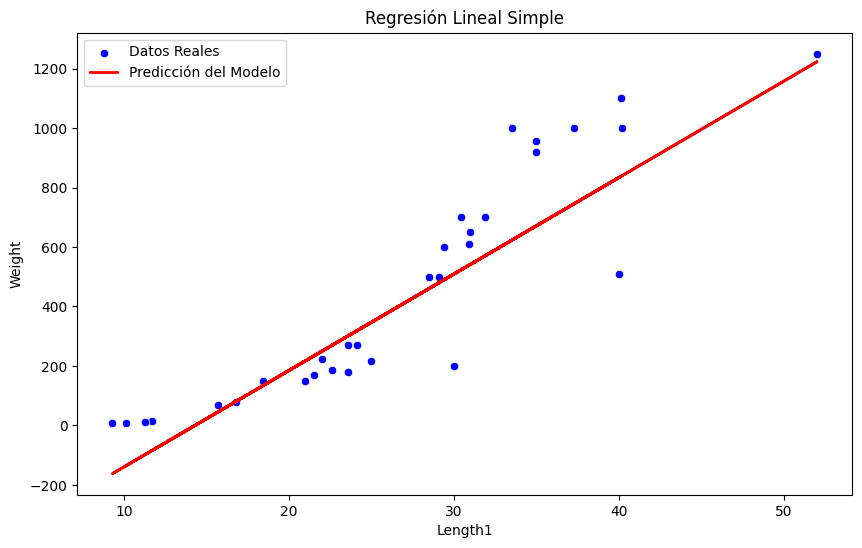

In [ ]:
# Visualizar la regresión lineal simple
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_simple['Length1'], y=y_test_simple, color='blue', label='Datos Reales')
plt.plot(X_test_simple, y_pred_simple, color='red', label='Predicción del Modelo', linewidth=2)
plt.title('Regresión Lineal Simple')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.legend()
plt.show()

**REGRESIÓN LINEAL MULTIPLE**

In [ ]:
# Seleccionar las variables independientes
X_multiple = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo de regresión lineal múltiple
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred_multiple = model_multiple.predict(X_test_multiple)

In [ ]:
# Evaluar el modelo de regresión lineal múltiple
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

In [ ]:
# Imprimir las métricas
print(f'\nRegresión Lineal Múltiple:')
print(f'MSE: {mse_multiple}')
print(f'RMSE: {rmse_multiple}')
print(f'MAE: {mae_multiple}')
print(f'R²: {r2_multiple}')



Regresión Lineal Múltiple:
MSE: 16763.88719314074
RMSE: 129.47543084748065
MAE: 103.90941708422301
R²: 0.8821430593048695


Para el MSE y RMSE son significaticamente mas bajos que el modelo simple, lo que nos indica que las predicciones son mas precias. EL MAE de 103.91 tambien nos informa que las predicciones se desvian en 103.91 unidades del valor real, el modelo es mas efectivo para capturar la relación entre las multiples variables independientes y el peso de las especies

Con el r2 tenemos buena capacidad predictiva de 0.88 el modelo multiple explica aproximadamente el 88% de la variacion en el peso  lo cual quiere deicir que el modelo interpreta mejor las relaciones complejas estre las caracteristicas fisicas y el peso

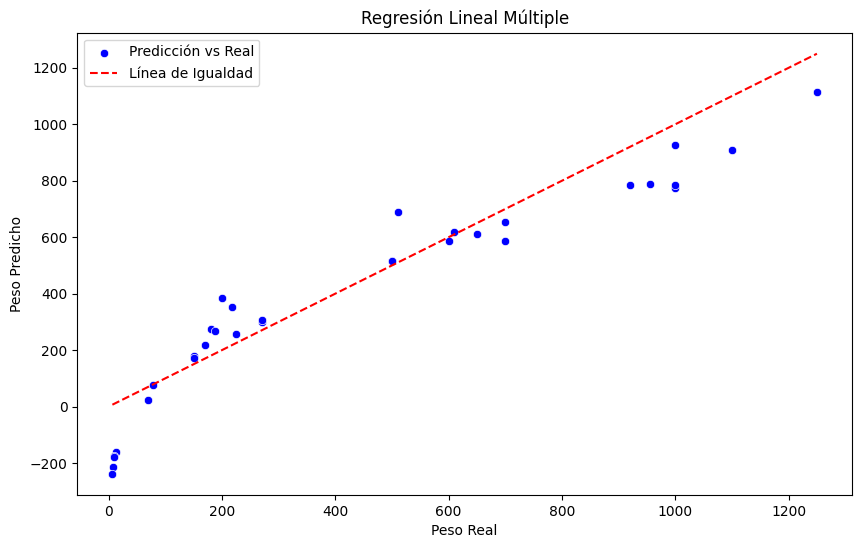

In [ ]:
# Visualizar la regresión lineal múltiple
# Para simplificar la visualización, se puede usar un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_multiple, y=y_pred_multiple, color='blue', label='Predicción vs Real')
plt.plot([min(y_test_multiple), max(y_test_multiple)], [min(y_test_multiple), max(y_test_multiple)], color='red', linestyle='--', label='Línea de Igualdad')
plt.title('Regresión Lineal Múltiple')
plt.xlabel('Peso Real')
plt.ylabel('Peso Predicho')
plt.legend()
plt.show()